In [63]:
import matplotlib.image as mpimg 
import random

In [64]:
img=mpimg.imread('IMG_1878.jpg')

In [65]:
img

array([[[ 65,  39,  24],
        [ 61,  37,  35],
        [ 52,  31,  38],
        ...,
        [ 75,  51,  39],
        [111, 100,  96],
        [139, 138, 134]],

       [[ 47,  25,  14],
        [ 72,  48,  48],
        [ 63,  41,  44],
        ...,
        [ 88,  66,  55],
        [105,  91,  88],
        [164, 155, 156]],

       [[ 54,  35,  28],
        [ 51,  32,  26],
        [ 60,  39,  36],
        ...,
        [ 99,  77,  64],
        [ 95,  74,  69],
        [141, 121, 123]],

       ...,

       [[ 57,  49,  47],
        [ 55,  47,  45],
        [ 52,  44,  42],
        ...,
        [ 78,  73,  67],
        [ 81,  76,  70],
        [ 75,  70,  64]],

       [[ 45,  37,  35],
        [ 43,  35,  33],
        [ 41,  33,  31],
        ...,
        [ 75,  68,  62],
        [ 82,  75,  69],
        [ 77,  72,  68]],

       [[ 41,  33,  31],
        [ 42,  34,  32],
        [ 42,  34,  32],
        ...,
        [ 77,  70,  64],
        [ 76,  68,  65],
        [ 82,  74,  71]]

In [66]:
img.shape

(1024, 768, 3)

In [67]:
Xr=img[:,:,0]
Xg=img[:,:,1]
Xb=img[:,:,2]

In [68]:
Xr.shape

(1024, 768)

In [69]:
import numpy as np
def extract_channels(Xr,Xg,Xb, blocks):
    R=np.array(Xr)
    G=np.array(Xg)
    B=np.array(Xb)
    
    r_indexes=random.sample(list(range(0,R.shape[0]-8)),blocks//3)
    g_indexes=random.sample(list(range(0,G.shape[0]-8)),blocks//3)
    b_indexes=random.sample(list(range(0,B.shape[0]-8)),blocks//3)
    
    
    r_channels=np.array([R[i:i+8,:] for i in r_indexes])
    b_channels=np.array([B[i:i+8,:] for i in b_indexes])
    g_channels=np.array([G[i:i+8,:] for i in g_indexes])
    

    r_block=r_channels[0]
    for i in range(1,r_channels.shape[0]):
        r_block=np.concatenate((r_block,r_channels[i]),axis=1)
    
    #print(r_block.shape)
    
    b_block=b_channels[0]
    for i in range(1,b_channels.shape[0]):
        b_block=np.concatenate((b_block,b_channels[i]),axis=1)
    
    #print(b_block.shape)
    
    g_block=g_channels[0]
    for i in range(1,g_channels.shape[0]):
        g_block=np.concatenate((g_block,g_channels[i]),axis=1)
    
    #print(g_block.shape)
    
    
    final_block=np.concatenate((r_block,g_block,b_block),axis=1)
    print('Dimension of the R block is',final_block.shape)
    
    return final_block
#extract_channels(Xr,Xg,Xb,9)

In [70]:
R=extract_channels(Xr,Xg,Xb,9)
R=R.astype('float64')

Dimension of the R block is (8, 6912)


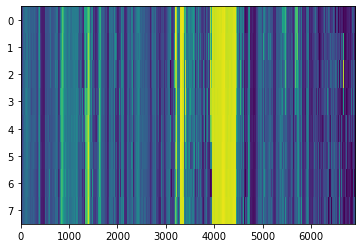

In [71]:
from matplotlib import pyplot as plt
plt.imshow(R,aspect='auto')

In [72]:
for i in range(0,len(R)):
    mean=np.mean(R[i])
    R[i]-=mean
    
    

In [73]:
co_var=R.dot(R.T)

In [74]:
co_var.shape

(8, 8)

In [75]:
eig_val,eig_vect=np.linalg.eig(co_var)

In [76]:
eig_val

array([1.65815324e+08, 5.35678748e+06, 2.57232665e+06, 1.74957831e+06,
       1.29097837e+06, 2.70750539e+05, 9.15198980e+05, 5.34009984e+05])

In [77]:
eig_vect

array([[ 0.35735883,  0.41895852, -0.35517679, -0.43605855,  0.44933707,
         0.17403574,  0.28209997,  0.26210337],
       [ 0.3598591 ,  0.42491202, -0.24174759, -0.04239587, -0.20189231,
        -0.38012811, -0.41875365, -0.51874791],
       [ 0.35831294,  0.32981011,  0.05263524,  0.42636139, -0.48903402,
         0.44606064, -0.05824147,  0.36981912],
       [ 0.3574974 ,  0.11691278,  0.42719487,  0.40763163,  0.22868517,
        -0.43088552,  0.51556989, -0.07807982],
       [ 0.35443512, -0.12902608,  0.55901184, -0.14953285,  0.36050508,
         0.41988831, -0.4051435 , -0.22904662],
       [ 0.35092638, -0.28398709,  0.238634  , -0.51149191, -0.37970066,
        -0.38708935, -0.06315961,  0.42383009],
       [ 0.34772089, -0.44048116, -0.25244271, -0.09886713, -0.29050256,
         0.3048185 ,  0.45795858, -0.47384848],
       [ 0.34193589, -0.47975012, -0.4438174 ,  0.40785927,  0.32765267,
        -0.14670748, -0.31305615,  0.25042582]])

In [78]:
eig_vect.shape

(8, 8)

In [79]:
result=(eig_vect.T).dot(R)

In [80]:
result.shape

(8, 6912)

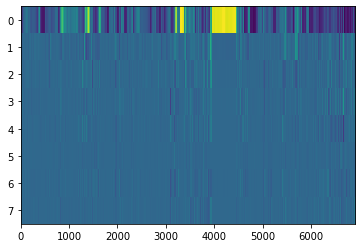

In [81]:
plt.imshow(result, aspect='auto')

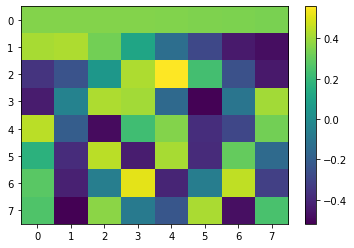

In [82]:
from matplotlib import pyplot as plt
plt.imshow(eig_vect.T,aspect='auto');
plt.colorbar();

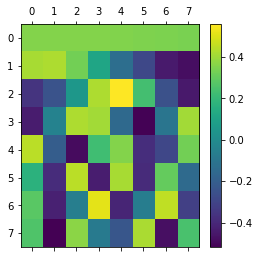

In [83]:
from matplotlib import pyplot as plt
plt.matshow(eig_vect.T,aspect='auto');
plt.colorbar();

In [84]:
R=extract_channels(Xr,Xg,Xb,90)
R=R.astype('float64')

Dimension of the R block is (8, 69120)


In [85]:
for i in range(0,len(R)):
    mean=np.mean(R[i])
    R[i]-=mean
    

In [86]:
co_var=R.dot(R.T)

In [87]:
co_var.shape

(8, 8)

In [88]:
eig_val,eig_vect=np.linalg.eig(co_var)

In [89]:
result=(eig_vect.T).dot(R)

In [90]:
result.shape

(8, 69120)

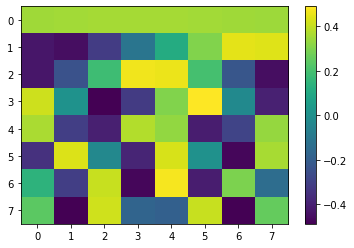

In [91]:
from matplotlib import pyplot as plt
plt.imshow(eig_vect.T,aspect='auto');
plt.colorbar();

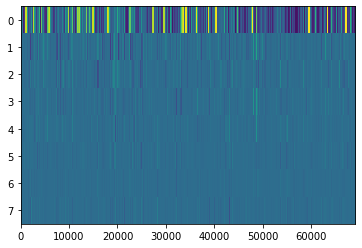

In [92]:
plt.imshow(result,aspect='auto')